<a href="https://colab.research.google.com/github/farahwadya/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
**Name:** Farah Alwadya

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Project Overview

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Load and Inspect Data

In [39]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales=pd.read_csv(fpath)

In [40]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df_sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [42]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data



In [43]:
df_sales.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [44]:
df_sales.rename(columns={'Item_Identifier': 'Item_Id','Outlet_Establishment_Year': 'Est_Year', 'Outlet_Identifier':'Outlet_Id'}	, inplace=True)
df_sales.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
df_sales.select_dtypes('int64','float64')

,Est_Year
0,1999
1,2009
2,1999
3,1998
4,1987
...,...
8518,1987
8519,2002
8520,2004
8521,2009


In [46]:
columns_to_convert = ['Item_Visibility', 'Item_Weight', 'Item_Outlet_Sales']
df_sales[columns_to_convert] = df_sales[columns_to_convert].apply(pd.to_numeric)
print(df_sales[columns_to_convert].dtypes)

Item_Visibility      float64
Item_Weight          float64
Item_Outlet_Sales    float64
dtype: object


In [47]:
df_sales.select_dtypes(include=['int64', 'float64'])

,Item_Weight,Item_Visibility,Item_MRP,Est_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


#### checking for duplicates

In [48]:
n_duplicates=df_sales.duplicated().sum()
n_duplicates

np.int64(0)

#### checking for missing data

In [49]:
n_missing=df_sales.isna().sum()
n_missing

,0
Item_Id,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Id,0
Est_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [50]:
check = df_sales.groupby('Item_Id')['Item_Weight'].nunique()

check[check > 1]

,Item_Weight
Item_Id,


In [51]:
# df_sales['Item_Weight'] = df_sales.groupby('Item_Id')['Item_Weight'].transform('mean')
# df_sales['Item_Weight']

In [52]:
df_sales['Item_Weight'].isna().sum()

np.int64(1463)

In [53]:
df_sales[df_sales['Item_Weight'].isna()]

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [54]:
# df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)
# df_sales['Item_Weight'].isna().sum()

In [55]:
print(df_sales[['Item_Id','Item_Weight']])

     Item_Id  Item_Weight
0      FDA15        9.300
1      DRC01        5.920
2      FDN15       17.500
3      FDX07       19.200
4      NCD19        8.930
...      ...          ...
8518   FDF22        6.865
8519   FDS36        8.380
8520   NCJ29       10.600
8521   FDN46        7.210
8522   DRG01       14.800

[8523 rows x 2 columns]


In [56]:
pd.crosstab(df_sales['Outlet_Type'], df_sales['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [57]:
df_sales['Outlet_Size'].nunique()

3

In [58]:
# for outlet_type in df_sales['Outlet_Type'].unique():
#     if outlet_type != 'Supermarket Type1':

#         most_common = df_sales[df_sales['Outlet_Type']==outlet_type]['Outlet_Size'].mode()[0] #[0] to not got a series, used while filling not taking report
#         df_sales.loc[df_sales['Outlet_Type']==outlet_type, 'Outlet_Size'] = \
#             df_sales.loc[df_sales['Outlet_Type']==outlet_type, 'Outlet_Size'].fillna(most_common)

# df_sales.loc[df_sales['Outlet_Type']=='Supermarket Type1', 'Outlet_Size'] = \
#     df_sales.loc[df_sales['Outlet_Type']=='Supermarket Type1', 'Outlet_Size'].fillna('Missing')

# print(df_sales[['Outlet_Type','Outlet_Size']].isna().sum())

In [74]:
print(df_sales[['Outlet_Type','Outlet_Size']].isna().sum())
df_sales['Item_Weight'].isna().sum()

Outlet_Type       0
Outlet_Size    2410
dtype: int64


np.int64(1463)

In [76]:
df_sales.isnull().sum()
df_sales.isnull().mean() * 100   # النسبة %

,0
Item_Id,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Id,0.000000
Est_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


#### checking for consistency

In [59]:
df_sales.head(5)

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
object_cols = df_sales.select_dtypes(include='object')
print(object_cols.nunique()) #Outlet_Type Outlet_Size Item_Fat_Content Outlet_Location_Type Outlet_Type

Item_Id                 1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Id                 10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64


In [61]:
cols_to_check = ['Outlet_Type', 'Outlet_Size', 'Item_Fat_Content', 'Outlet_Location_Type']

# نعرض القيم الفريدة لكل عمود بدون حذف أي شيء
for col in cols_to_check:
    print(f"unique values {col}:")
    print(df_sales[col].unique())

unique values Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
unique values Outlet_Size:
['Medium' nan 'High' 'Small']
unique values Item_Fat_Content:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
unique values Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']


In [62]:
# item fat content:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'})
df_sales['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

##### statistical results

In [63]:
numerical_cols = df_sales.select_dtypes(include=['int64', 'float64'])

# نعرض الملخص الإحصائي لكل عمود: min, max, mean
summary_stats = numerical_cols.agg(['min', 'max', 'mean'])
print(summary_stats)

      Item_Weight  Item_Visibility    Item_MRP     Est_Year  Item_Outlet_Sales
min      4.555000         0.000000   31.290000  1985.000000          33.290000
max     21.350000         0.328391  266.888400  2009.000000       13086.964800
mean    12.857645         0.066132  140.992782  1997.831867        2181.288914


## Exploratory Data Analysis

#### Histograms to view the distributions of numerical features in the dataset

In [64]:
df_sales.head()

,Item_Id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Id,Est_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


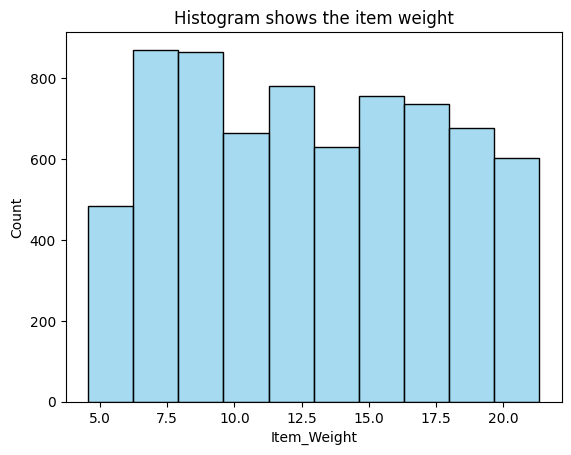

In [65]:
plt.figure()
sns.histplot(df_sales['Item_Weight'],bins=10,color='skyblue')
plt.title('Histogram shows the item weight')
plt.show()


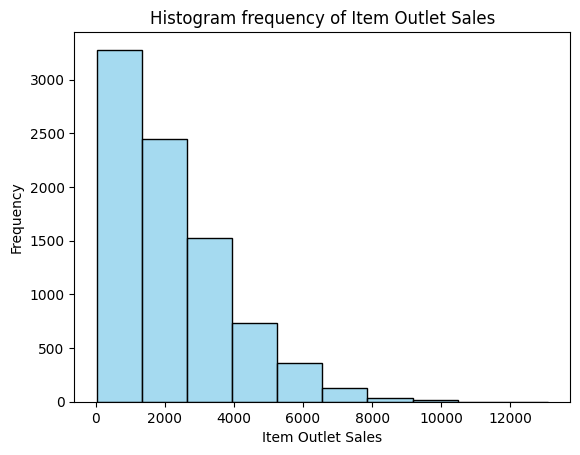

In [66]:
sns.histplot(df_sales['Item_Outlet_Sales'],bins=10,color='skyblue',edgecolor='black')
plt.title('Histogram frequency of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

#### Boxplots to view statistical summaries of numerical features in your dataset

#### boxplot for the Item_Visibility column




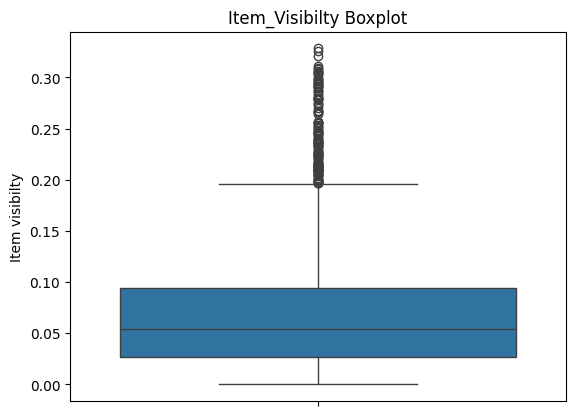

In [67]:
sns.boxplot(data=df_sales,y='Item_Visibility')
plt.title('Item_Visibilty Boxplot')
plt.ylabel('Item visibilty')
plt.show()

#### boxplot for the estimation year column:
the result down show no outlier

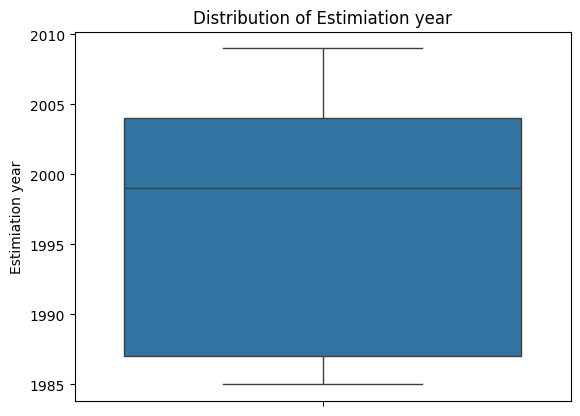

In [68]:
sns.boxplot(data=df_sales,y='Est_Year')
plt.title('Distribution of Estimiation year')
plt.ylabel('Estimiation year')
plt.show()


#### Countplots to view the frequency of each class of categorial features in your dataset.

In [69]:
df_sales.select_dtypes(include=['object', 'category']).columns

Index(['Item_Id', 'Item_Fat_Content', 'Item_Type', 'Outlet_Id', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

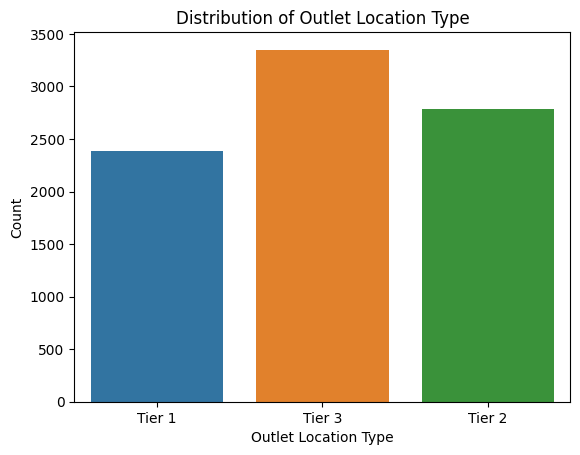

In [70]:
sns.countplot(data=df_sales,x='Outlet_Location_Type',hue='Outlet_Location_Type')
plt.title('Distribution of Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.show()


### countplot for the outlet type column

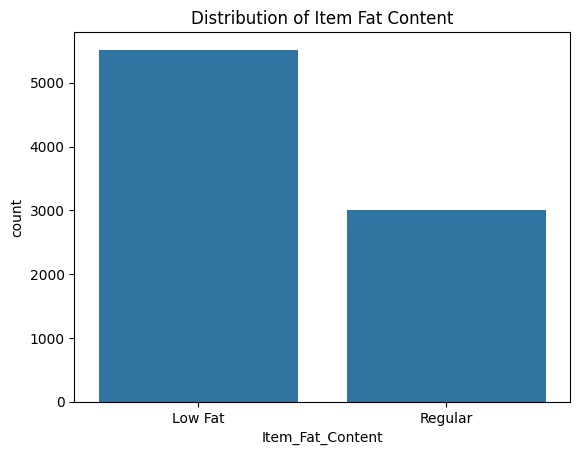

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_sales, x='Item_Fat_Content')
plt.title('Distribution of Item Fat Content')
plt.show()

### scatter plot show the relation between Item Visibility vs Outlet Sales

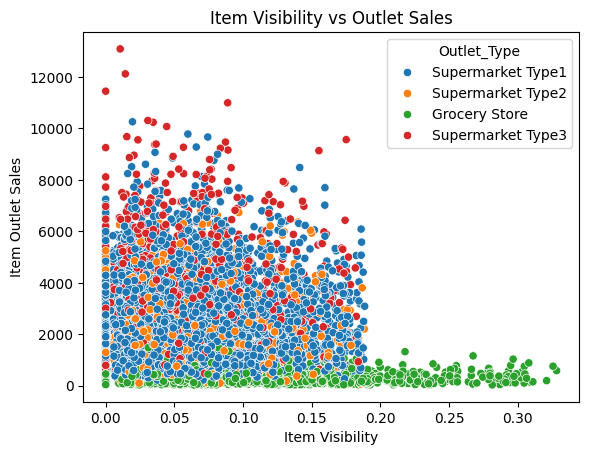

In [72]:
sns.scatterplot(data=df_sales, x='Item_Visibility', y='Item_Outlet_Sales',  hue='Outlet_Type')
plt.title('Item Visibility vs Outlet Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

## Feature Inspection


